In [27]:
# !conda install -y pandas

In [2]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

TensorFlow version: 2.2.0
Eager execution is: True
Keras version: 2.3.0-tf


# Fashion MNIST
<img src="images/fashion_mnist.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" 
     width=850/>

## MNIST Utilities

In [6]:
def plot_mnist_image(image):
    reshaped = image.reshape(28, 28)
    plt.imshow(reshaped, cmap="binary")
    plt.axis("off")
    
def plot_mnist_images(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

## Data loading

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
print(type(x_train))
print(x_train.shape)
print(x_train.dtype)
print(y_train.shape)
print(y_train.dtype)

<class 'numpy.ndarray'>
(60000, 28, 28)
uint8
(60000,)
uint8


In [18]:
print(type(x_test))
print(x_test.shape)
print(x_test.dtype)
print(y_test.shape)
print(y_test.dtype)

<class 'numpy.ndarray'>
(10000, 28, 28)
uint8
(10000,)
uint8


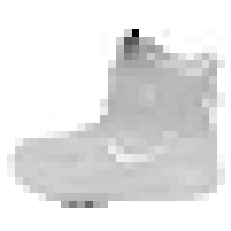

In [32]:
%matplotlib inline
plot_mnist_image(tf_x_train[0])
plt.show()

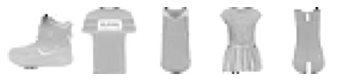

In [35]:
plot_mnist_images(tf_x_train[0:5])

In [17]:
x_full = np.concatenate((x_train, x_test), axis=0)
x_full.shape

(70000, 28, 28)

In [20]:
layer = tf.keras.layers.experimental.preprocessing.Normalization(dtype=tf.float32)
layer.adapt(x_full)

In [23]:
layer(x_train)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a uint8 tensor but is a float tensor [Op:Sub]

In [9]:
hoge = tf.constant([1., 2., 3.])
tf.linalg.normalize(hoge)

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26726124, 0.5345225 , 0.8017837 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.7416575], dtype=float32)>)

In [10]:
tf_vector = tf.constant([1., 2., 5.])
tf.linalg.normalize(tf_vector)

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.18257418, 0.36514837, 0.9128709 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.477226], dtype=float32)>)

In [11]:
tf_vector / np.linalg.norm(tf_vector)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.18257418, 0.36514837, 0.9128709 ], dtype=float32)>

In [12]:
tf.keras.utils.normalize(tf_vector)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.18257418, 0.36514837, 0.9128709 ]], dtype=float32)>

In [13]:
tf_x_train = tf.keras.utils.normalize(x_train)

In [ ]:
layer.adapt()

In [22]:
tf.data.Dataset.from_tensors(x_train)

<TensorDataset shapes: (60000, 28, 28), types: tf.uint8>

In [21]:
tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(60000, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,